<a href="https://colab.research.google.com/github/RedCanister/TC_Financas/blob/main/TC_Finan%C3%A7as%20-%20C%C3%B3digo%20Fonte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn


In [ ]:
# AAPL | AMZN | META | NFLX | NVDA | GOOG

O LSTM consegue fazer o treinamento de dados em vários períodos e até intervalos para ter um bom desempenho.

**Primeiro**, o LSTM foi treinado com dados de 5 anos em intervalos de 1 dia da empresa NVIDIA.

**Segundo**, período de 1 mês com intervalos de 30min, para adicionar variação.

**Terceiro**, período de 3 meses com intervalos de 1 dia, para realizar a previsão de valores futuros.

# Treinando e explorando

In [40]:
import yfinance as yf

symbols = ["AAPL", "AMZN", "META", "NFLX", "NVDA", "GOOG"]

nvidia = yf.Ticker(symbols[4])
nvidia_years = nvidia.history(period="5y", interval="1d", rounding=True)
nvidia_years

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-03 00:00:00-05:00,5.03,5.17,4.99,5.17,465232000,0.0,0.0
2019-12-04 00:00:00-05:00,5.25,5.28,5.19,5.21,273424000,0.0,0.0
2019-12-05 00:00:00-05:00,5.24,5.25,5.17,5.20,184884000,0.0,0.0
2019-12-06 00:00:00-05:00,5.27,5.32,5.26,5.28,232236000,0.0,0.0
2019-12-09 00:00:00-05:00,5.26,5.34,5.25,5.28,211880000,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,141.99,142.05,135.82,136.02,344941900,0.0,0.0
2024-11-26 00:00:00-05:00,137.70,139.30,135.67,136.92,190287700,0.0,0.0
2024-11-27 00:00:00-05:00,135.01,137.22,131.80,135.34,226370900,0.0,0.0


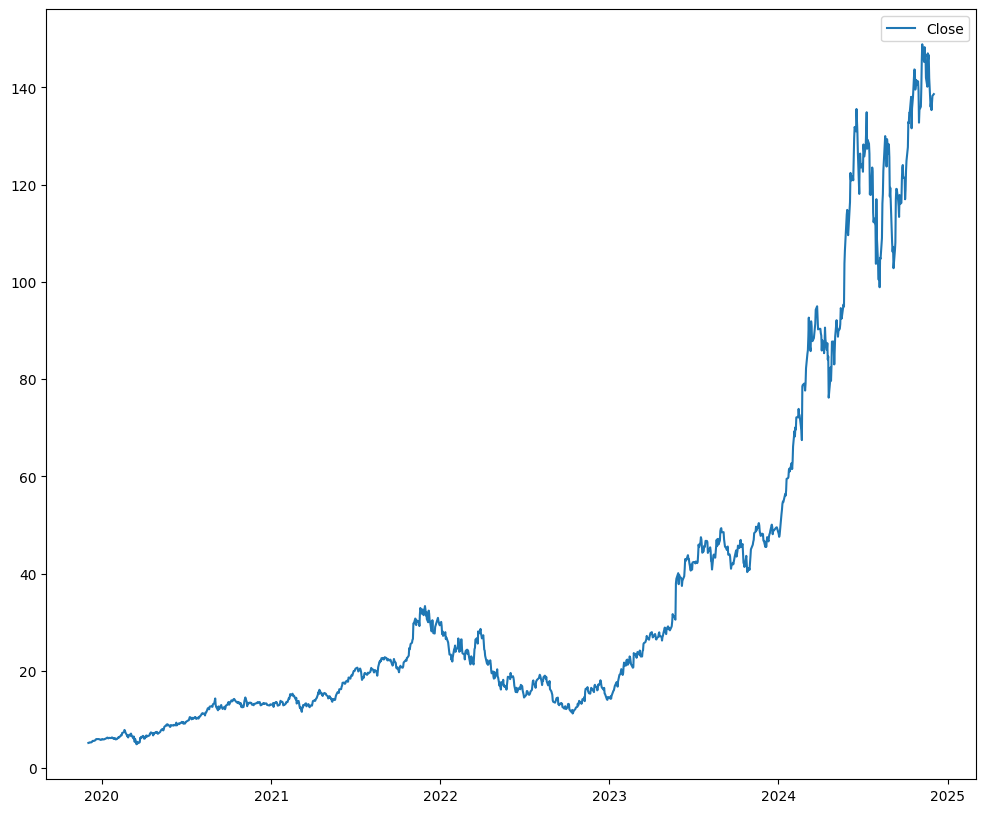

In [39]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(nvidia_years.index, nvidia_years['Close'], label='Close')
plt.legend()


In [43]:
import yfinance as yf

symbols = ["AAPL", "AMZN", "META", "NFLX", "NVDA", "GOOG"]

apple = yf.Ticker(symbols[0])
apple_years = apple.history(period="5y", interval="1d", rounding=True)
apple_years

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-03 00:00:00-05:00,62.61,62.90,62.12,62.88,114430400,0.0,0.0
2019-12-04 00:00:00-05:00,63.28,63.82,63.18,63.44,67181600,0.0,0.0
2019-12-05 00:00:00-05:00,63.93,64.44,63.68,64.37,74424400,0.0,0.0
2019-12-06 00:00:00-05:00,64.83,65.68,64.79,65.61,106075600,0.0,0.0
2019-12-09 00:00:00-05:00,65.44,65.63,64.21,64.69,128042400,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,231.46,233.25,229.74,232.87,90152800,0.0,0.0
2024-11-26 00:00:00-05:00,233.33,235.57,233.33,235.06,45986200,0.0,0.0
2024-11-27 00:00:00-05:00,234.47,235.69,233.81,234.93,33498400,0.0,0.0


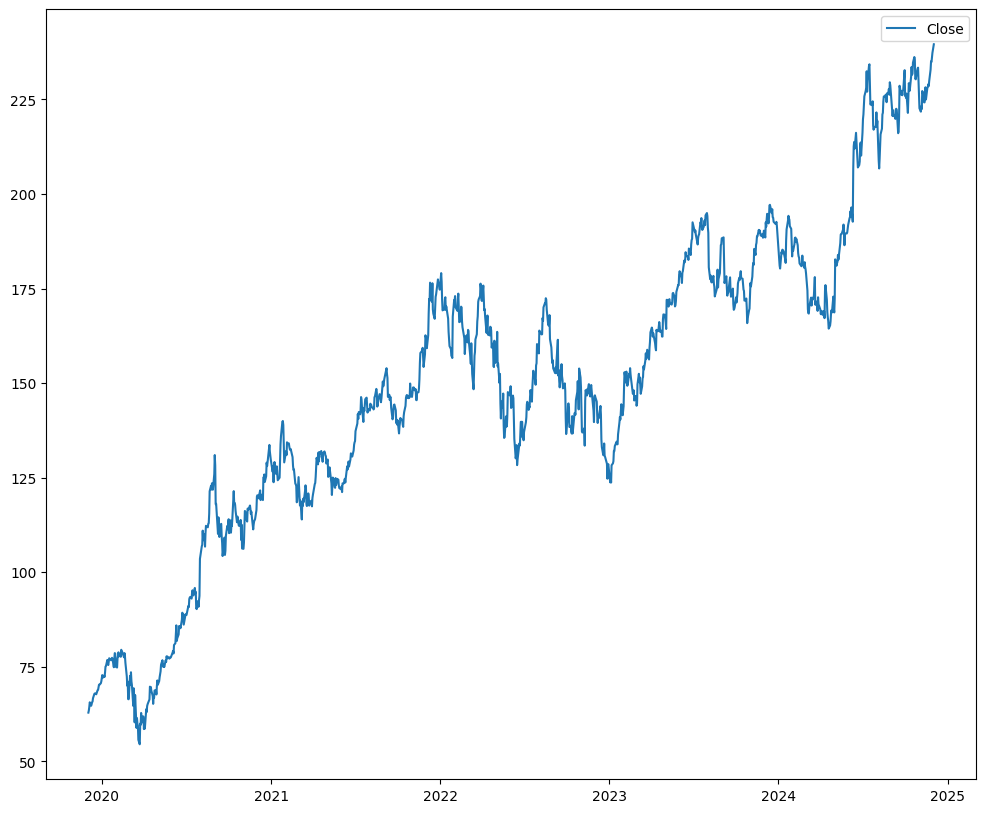

In [47]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(apple_years.index, apple_years['Close'], label='Close')
plt.legend()


In [45]:
import yfinance as yf

symbols = ["AAPL", "AMZN", "META", "NFLX", "NVDA", "GOOG"]

meta = yf.Ticker(symbols[2])
meta_years = meta.history(period="5y", interval="1d", rounding=True)
meta_years

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-12-03 00:00:00-05:00,197.01,198.33,194.49,198.22,11595300,0.0,0.0
2019-12-04 00:00:00-05:00,199.40,199.43,197.46,198.11,8456300,0.0,0.0
2019-12-05 00:00:00-05:00,199.26,200.69,197.62,198.76,9740400,0.0,0.0
2019-12-06 00:00:00-05:00,199.90,200.96,199.46,200.45,12270600,0.0,0.0
2019-12-09 00:00:00-05:00,200.05,202.53,199.61,200.74,11954800,0.0,0.0
...,...,...,...,...,...,...,...
2024-11-25 00:00:00-05:00,562.10,572.59,556.39,565.11,13599800,0.0,0.0
2024-11-26 00:00:00-05:00,566.00,577.50,565.20,573.54,10356600,0.0,0.0
2024-11-27 00:00:00-05:00,574.89,574.98,564.10,569.20,7200200,0.0,0.0


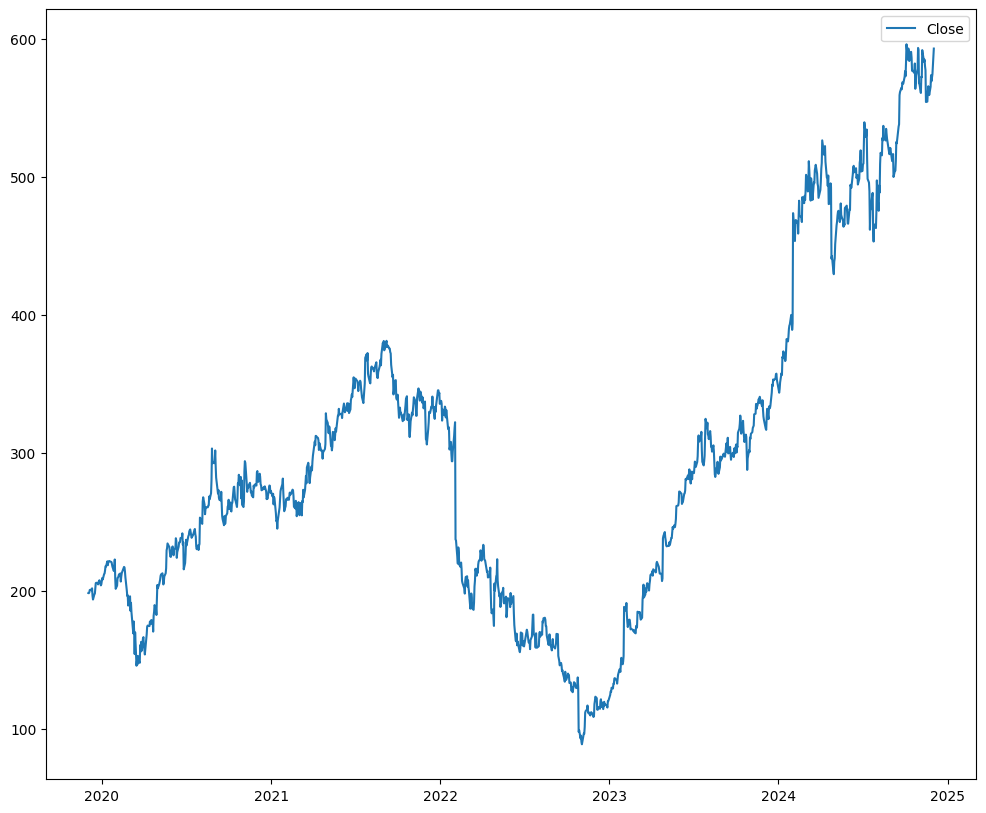

In [48]:
fig, ax = plt.subplots(figsize=(12, 10))

ax.plot(meta_years.index, meta_years['Close'], label='Close')
plt.legend()


## Gráficos e desenvolvimento

# Fine-tuning



In [66]:
# Importação das bibliotecas necessárias
import yfinance as yf
import pandas as pd

# Lista de empresas cujos dados financeiros serão extraídos. Aqui, estamos usando NVIDIA como exemplo.
company = ["NVDA"]

# Lista de períodos disponíveis para extração dos dados.
# "5y" significa 5 anos, "1mo" significa 1 mês, e assim por diante.
periods = ["5y", "1mo", "3mo", "6mo"]

# Lista de intervalos possíveis entre os dados extraídos.
# "1d" significa dados diários, "1wk" semanal, "1mo" mensal, e "3mo" trimestral.
intervals = ["1d", "1wk", "1mo", "3mo"]

# Função para extração de dados financeiros usando a biblioteca yfinance
def stock_extract_data(company, period, interval):

    # Obtém os dados do histórico da empresa especificada pelo ticker
    # A seleção de colunas restringe os dados às colunas "Open", "High", "Low" e "Close"
    data = yf.Ticker(company).history(
        period=period, interval=interval, rounding=True
    )[["Open", "High", "Low", "Close"]]

    # Verifica se o DataFrame resultante está vazio
    if data.empty:
        raise ValueError("Sem dados encontrados. Verifique o símbolo do ticker ou o intervalo.")

    return data


In [67]:
# Importação de bibliotecas necessárias
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import torch

# Função para pré-processar os dados
# Parâmetros:
# - data: array ou DataFrame contendo os dados de entrada
# - seq_length: inteiro, comprimento da sequência usada para treinamento
# - scaler_: instância de um escalador (ex.: MinMaxScaler) para normalizar os dados
def data_scale_split(data, seq_length, scaler_):

    # Normalização dos dados usando o escalador fornecido
    scaler = scaler_
    scaled_data = scaler.fit_transform(data)

    # Inicializando listas para armazenar as sequências de treinamento e os rótulos
    sequences, labels, highs, lows = [], [], [], []

    # Loop para criar janelas deslizantes de dados de tamanho seq_length
    for i in range(len(scaled_data) - seq_length):
        # Cria uma sequência com base no comprimento seq_length
        seq = scaled_data[i : i + seq_length]  # Subconjunto de dados para treinamento
        label = scaled_data[i + seq_length, -1]  # Valor de fechamento (alvo) após a sequência
        high = scaled_data[i + seq_length, 1]   # Valor "High" associado ao fechamento
        low = scaled_data[i + seq_length, 2]    # Valor "Low" associado ao fechamento

        # Adiciona as janelas criadas às respectivas listas
        sequences.append(seq)
        labels.append(label)
        highs.append(high)
        lows.append(low)

    # Converte as listas para tensores PyTorch para uso em modelos de deep learning
    x = torch.tensor(np.array(sequences), dtype=torch.float32)  # Sequências de entrada
    y = torch.tensor(np.array(labels), dtype=torch.float32)     # Rótulos (alvo)
    high = torch.tensor(np.array(highs), dtype=torch.float32).unsqueeze(1)  # Limite superior (com dimensão adicional)
    low = torch.tensor(np.array(lows), dtype=torch.float32).unsqueeze(1)    # Limite inferior (com dimensão adicional)

    # Retorna os tensores processados e o escalador usado para normalização
    return x, y, high, low, scaler


In [68]:
# Função para dividir os dados em conjuntos de treinamento, validação e teste
# Parâmetros:
# - data: lista ou array contendo os dados a serem divididos
def train_val_test_split(data, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):

    # Definindo as proporções para os conjuntos
    # 70% para treinamento, 15% para validação, 15% para teste
    train_ratio, val_ratio, test_ratio = 0.7, 0.15, 0.15

    # Garantindo que as proporções somem exatamente 1
    # A função `assert` verifica a condição e lança um erro caso ela não seja atendida
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-5, "Razões devem somar até 1."

    # Calculando o tamanho do conjunto de treinamento com base na proporção
    train_size = int(len(data) * train_ratio)

    # Calculando o tamanho do conjunto de validação com base na proporção
    val_size = int(len(data) * val_ratio)

    # Dividindo os dados em conjuntos com base nos tamanhos calculados
    train = data[:train_size]  # Conjunto de treinamento
    val = data[train_size : train_size + val_size]  # Conjunto de validação
    test = data[train_size + val_size :]  # Conjunto de teste (restante)

    # Retorna os conjuntos divididos
    return train, val, test


In [69]:
# Importação das bibliotecas necessárias do PyTorch
import torch
import torch.nn as nn

# Definição de um mecanismo de atenção como classe para uso em redes neurais
class Attention(nn.Module):
    def __init__(self, hidden_size):
        """
        Inicializa o mecanismo de atenção.
        Parâmetros:
        - hidden_size: tamanho das camadas ocultas do LSTM, usado para definir as dimensões da atenção.
        """

        super(Attention, self).__init__()

        # Camada linear para calcular os escores de atenção
        # Multiplica (hidden_size * 2) dimensões das saídas do LSTM por 1 (resultado escalar por passo temporal)
        self.attention = nn.Linear(hidden_size * 2, 1)

    def forward(self, lstm_output):
        """
        Executa o mecanismo de atenção sobre as saídas do LSTM.
        Parâmetro:
        - lstm_output: tensor com saídas do LSTM (batch_size, seq_len, hidden_size * 2).
        Retorna:
        - context_vector: vetor de contexto resultante da soma ponderada (batch_size, hidden_size * 2).
        - attention_weights: pesos de atenção normalizados (batch_size, seq_len).
        """

        # Calcula os escores de atenção para cada passo temporal
        # Saída: (batch_size, seq_len, 1)
        scores = self.attention(lstm_output)

        # Remove a dimensão extra (última dimensão) para facilitar operações posteriores
        # Saída: (batch_size, seq_len)
        scores = scores.squeeze(-1)

        # Aplica a função softmax para normalizar os escores ao longo do eixo da sequência (dim=1)
        # Gera os pesos de atenção: valores no intervalo [0, 1], cuja soma é 1 para cada sequência
        attention_weights = torch.softmax(scores, dim=1)

        # Calcula o vetor de contexto como uma soma ponderada das saídas do LSTM
        # Multiplica cada saída do LSTM pelos pesos de atenção correspondentes
        # `attention_weights.unsqueeze(-1)` expande os pesos para alinhar com as dimensões do LSTM
        # Saída: (batch_size, hidden_size * 2)
        context_vector = torch.sum(lstm_output * attention_weights.unsqueeze(-1), dim=1)

        # Retorna o vetor de contexto e os pesos de atenção
        return context_vector, attention_weights


In [70]:
import torch
import torch.nn as nn

# Modelo LSTM desenvolvido para prever valores de fechamento entre os valores máximos e mínimos de cada dia
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        """
        Inicializa o modelo LSTM com atenção.
        Parâmetros:
        - input_size: número de características (features) de entrada.
        - hidden_size: tamanho das camadas ocultas do LSTM.
        - num_layers: número de camadas LSTM empilhadas.
        - output_size: tamanho da saída final (geralmente 1 para regressão de valores únicos).
        """
        super(LSTMModel, self).__init__()

        # Definição do LSTM bidirecional
        # batch_first=True: garante que a entrada tenha a forma (batch_size, seq_len, input_size)
        # bidirectional=True: permite que o LSTM processe sequências em ambas as direções (frente e trás)
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=True
        )

        # Mecanismo de atenção, definido como uma camada separada
        # hidden_size é usado para calcular escores de atenção
        self.attention = Attention(hidden_size)

        # Camada totalmente conectada (FC) para processar o vetor de contexto da atenção
        # Inclui duas camadas ReLU e Dropout para prevenir overfitting
        self.fc = nn.Sequential(
            nn.Linear(hidden_size * 2, hidden_size),  # Entrada: vetor bidirecional do LSTM
            nn.ReLU(),
            nn.Dropout(0.3),  # Dropout para regularização
            nn.Linear(hidden_size, hidden_size // 2),  # Redução das dimensões intermediárias
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(hidden_size // 2, output_size)  # Saída: valor final de previsão
        )

    def forward(self, x, high, low):
        """
        Propagação direta do modelo.
        Parâmetros:
        - x: tensor de entrada com forma (batch_size, seq_len, input_size).
        - high: tensor com valores máximos para normalização (batch_size, 1).
        - low: tensor com valores mínimos para normalização (batch_size, 1).
        Retorna:
        - out: tensor com os valores previstos (batch_size, output_size).
        - attention_weights: pesos de atenção calculados para cada passo temporal.
        """

        # Inicializando os estados ocultos e de célula com zeros
        # `num_layers * 2` por ser um LSTM bidirecional
        h0 = torch.zeros(self.lstm.num_layers * 2, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers * 2, x.size(0), self.lstm.hidden_size).to(x.device)

        # Propagação dos dados através do LSTM
        # `out` contém as saídas do LSTM para todos os passos temporais
        out, _ = self.lstm(x, (h0, c0))

        # Aplicando o mecanismo de atenção nas saídas do LSTM
        # `context_vector` é a soma ponderada das saídas do LSTM
        # `attention_weights` são os pesos de atenção calculados
        context_vector, attention_weights = self.attention(out)

        # Passa o vetor de contexto pelas camadas totalmente conectadas (FC)
        out = self.fc(context_vector)

        # Normaliza a saída para o intervalo [0, 1] usando a função sigmoid
        out = torch.sigmoid(out)

        # Ajusta a saída para o intervalo entre `low` e `high` (valores mínimos e máximos do dia)
        # Fórmula: low + (high - low) * out (interpolação linear)
        out = low + (high - low) * out

        # Retorna a previsão final e os pesos de atenção
        return out, attention_weights


In [71]:
def train_model(model, x, y, high, low, criterion, optimizer, epochs, accum_steps):
    """
    Função de treinamento do modelo LSTM.
    Parâmetros:
    - model: o modelo a ser treinado (instância do LSTMModel).
    - x: tensor de entradas (dados de treinamento).
    - y: tensor de saídas reais (valores de fechamento).
    - high: tensor de valores máximos para normalização.
    - low: tensor de valores mínimos para normalização.
    - criterion: função de perda (ex: MSELoss).
    - optimizer: o otimizador usado para atualização dos pesos.
    - epochs: número de épocas para treinamento.
    - accum_steps: número de passos de acumulação de gradientes antes de realizar o otimizador.

    Retorna:
    - model: o modelo treinado.
    - avg_loss: perda média durante o treinamento.
    """
    model.train()  # Coloca o modelo em modo de treinamento (desativa camadas como dropout)

    # Laço de treinamento para todas as épocas
    for epoch in range(epochs):
        total_loss = 0  # Inicializa o valor total da perda para cada época

        # Realiza a propagação para frente no modelo
        # `outputs` são as previsões do modelo, `_` são os pesos de atenção não usados aqui
        outputs, _ = model(x, high, low)

        # Calcula a perda entre a previsão (outputs) e a verdade real (y)
        loss = criterion(outputs.squeeze(), y)  # `.squeeze()` remove dimensões desnecessárias

        # Realiza a retropropagação do erro para calcular os gradientes
        loss.backward()

        # Atualiza os pesos do modelo a cada `accum_steps` iterações
        if (epoch + 1) % accum_steps == 0:
            optimizer.step()  # Aplica a atualização dos parâmetros
            optimizer.zero_grad()  # Zera os gradientes acumulados para o próximo passo

        total_loss += loss.item()  # Adiciona o valor da perda para essa iteração ao total

        # Exibe a perda a cada 100 épocas para monitoramento
        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

    avg_loss = total_loss / epochs  # Calcula a perda média ao longo das épocas

    # Retorna o modelo treinado e a perda média
    return model, avg_loss


## Selecting and splitting the data

In [72]:
# Definindo o comprimento da sequência para a preparação dos dados
sequence_length = 20

# Inicializando o MinMaxScaler para normalizar os dados entre 0 e 1
scaler = MinMaxScaler(feature_range=(0, 1))

# Extraindo os dados do Yahoo Finance para a empresa especificada
# `company[0]`, `periods[0]`, e `intervals[0]` são os parâmetros para a função `stock_extract_data`
stock = stock_extract_data(company[0], periods[0], intervals[0])

# Pré-processamento dos dados: escalonamento e divisão em sequências
# `x` são as sequências de dados, `y` são os valores de fechamento (alvo),
# `high` e `low` são os limites superior e inferior (para reverter a normalização depois),
# e `scaler` é usado para reverter a transformação posteriormente.
x, y, high, low, scaler = data_scale_split(stock, sequence_length, scaler)

# Dividindo os dados em conjuntos de treino, validação e teste
train_x, val_x, test_x = train_val_test_split(x)
train_y, val_y, test_y = train_val_test_split(y)
train_high, val_high, test_high = train_val_test_split(high)
train_low, val_low, test_low = train_val_test_split(low)


In [73]:
input_data = np.array([[1505, 5, 10, 0]])
scaled_input = scaler.transform(input_data)
scaled_input

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[ 1.03901087e+01, -1.15082589e-03,  3.87979684e-02,
        -3.39606917e-02]])

In [74]:
predicted_value = scaler.inverse_transform(scaled_input)  # Assuming 'Close' was used as the output
predicted_value

array([[1505.,    5.,   10.,    0.]])

In [75]:
import pandas as pd

def download_tensor(tensor_):

    tensor_t = tensor_.cpu().numpy()
    tensor_t = tensor_t.tolist()
    name_t = ""

    df = pd.DataFrame(tensor_t)

    for name, obj in globals().items():
        if torch.is_tensor(obj) and torch.equal(obj, tensor_):
            name_t = name
            print(f"Tensor name: {name}")

    tensor_df = df.to_csv(f'{name_t}.csv', index=True)

    return tensor_df


In [ ]:
tensors = [
    train_x, train_y, train_high, train_low,
    val_x, val_y, val_high, val_low,
    test_x, test_y, test_high, test_low,
]

for tensor in tensors:
    #download_tensor(tensor)
    print(tensor)

## Training

In [79]:
# Parâmetros de treinamento mais recentes da fase de validação

input_size = 4
output_size = 1

hidden_size = 192
num_layers = 4
sequence_length = 20
num_epochs = 800
accum_steps = 10


In [ ]:
# Inicialização do modelo LSTM com os parâmetros definidos
training_model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Definindo o critério de perda (Loss Function) como MSE (Mean Squared Error)
# Isso é comum em problemas de regressão, onde queremos minimizar a diferença quadrática entre as previsões e os valores reais.
criterion = nn.MSELoss()

# Definindo o otimizador como Adam, que é um dos mais populares para treinamento de redes neurais
# O learning rate (taxa de aprendizado) foi definido como 0.001, o que é um valor comum para começar.
optimizer = torch.optim.Adam(training_model.parameters(), lr=0.001)

# Treinando o modelo com os dados de treinamento, utilizando a função `train_model`
# Aqui, `train_x`, `train_y`, `train_high` e `train_low` são os dados de entrada, alvo e limites superior/inferior.
# `num_epochs` é o número de épocas de treinamento, e `accum_steps` define o número de steps de acumulação de gradientes antes de atualizar os parâmetros.
trained_model, avg_loss = train_model(training_model, train_x, train_y, train_high, train_low, criterion, optimizer, num_epochs, accum_steps)

# Imprimindo o modelo treinado e a perda média durante o treinamento
print("Model:", trained_model)
print("Average Loss:", avg_loss)

# Retornando o modelo treinado, caso queira usá-lo para inferência ou avaliação futura
trained_model


In [ ]:
training_model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(training_model.parameters(), lr=0.001)

trained_model, avg_loss = train_model(training_model, train_x, train_y, train_high, train_low, criterion, optimizer, num_epochs, accum_steps)

print("Model:", trained_model)
print("Average Loss:", avg_loss)

trained_model

In [ ]:
import pickle

pickle_file = "LSTM_treinado_weights.pkl"
with open(pickle_file, "wb") as f:
    #pickle.dump(trained_model.state_dict(), f)

In [ ]:
import pickle

pickle_file = "LSTM_treinado_modelo.pkl"
with open(pickle_file, "wb") as f:
    #pickle.dump(trained_model, f)

In [ ]:
trained_model.eval()

with torch.no_grad():
    predict_train, _ = trained_model(test_x, test_high, test_low)

predict_train

## Validation and hyperparameter tuning

In [ ]:
!pip install optuna

In [ ]:
import logging
import optuna

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler())

def objective(trial):

    # Define hyperparameter search space
    input_size = 4
    output_size = 1

    hidden_size = trial.suggest_int('hidden_size', low=32, high=256, step=32)
    num_layers = trial.suggest_int('num_layers', low=1, high=5)
    sequence_length = trial.suggest_int('sequence_length', low=8, high=60, step=12)
    num_epochs = trial.suggest_int('num_epochs', low=600, high=800, step=200)
    accum_steps = trial.suggest_int('accum_steps', low=5, high=10, step=5)

    try:
        # Instantiate a new model for each trial
        model = LSTMModel(input_size, hidden_size, num_layers, output_size)

        # Define criterion and optimizer
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

        # Train and evaluate the model
        model, train_loss = train_model(model, train_x, train_y, train_high, train_low, criterion, optimizer, num_epochs, accum_steps)

        # Validation loss (or another metric) as the objective
        model.eval()
        with torch.no_grad():
            val_predictions, _ = model(val_x, val_high, val_low)
            val_loss = criterion(val_predictions[0], val_y)

        logging.info(f"Epoch {trial}: train_loss={train_loss}, val_loss={val_loss}")

        if trial.should_prune():
            logging.warning(f"Trial {trial.number} pruned.")
            raise optuna.exceptions.TrialPruned()

    except Exception as e:
        logging.error(f"Error in Trial {trial.number}: {str(e)}")
        raise e

    return val_loss


In [ ]:
import optuna

study = optuna.create_study(direction="minimize", pruner=optuna.pruners.MedianPruner())
#study.optimize(objective, n_trials=20)

print("Best Hyperparameters:")
trial = study.best_params

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

In [ ]:
from optuna.visualization import plot_optimization_history, plot_param_importances

plot_optimization_history(study).show()
plot_param_importances(study).show()

# Avaliação de métricas

In [ ]:
!pip install torchmetrics

In [ ]:
from torchmetrics import MeanSquaredLogError, MeanSquaredError, MeanAbsoluteError

msle = MeanSquaredLogError()
mse = MeanSquaredError()
mae = MeanAbsoluteError()

predict_train = predict_train.squeeze()

print("MSLE:", msle(predict_train, test_y).item())
print("MSE:", mse(predict_train, test_y).item())
print("MAE:", mae(predict_train, test_y).item())

In [ ]:
#model.eval()

#with torch.no_grad():
#    predictions = training[0](x)

import matplotlib.pyplot as plt

#test_y = test_y.detach().numpy()
predict_train = predict_train

plt.plot(test_y, label='Actual Prices')
plt.plot(predict_train, label='Predicted Prices')
plt.legend()
plt.show()

# Adaptando para a API

In [ ]:
import torch
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def predict_stock_price(open_value, high_value, low_value, model, scaler, seq_length):
    # Step 1: Prepare the input data (Open, High, Low) into the same shape as during training
    input_data = np.array([[open_value, high_value, low_value, 0]])
    scaled_input = scaler.transform(input_data)  # Use the scaler from training to scale input data

    # Step 2: Create sequences (we assume the model is trained with sequences)
    # If the sequence length is more than 1, you'll need to prepare a sequence of the past data,
    # but for simplicity, this example uses only the latest values.
    # The `seq_length` would normally be the number of time steps the model was trained on.

    # Since we only have one point (the user input), we'll need to pad the data to match the sequence length
    # For simplicity, let's assume that you have already preprocessed the data with the correct sequence length
    # We create a "fake" sequence here (in reality, you'd need to feed the model previous data as well).
    sequence = np.repeat(scaled_input, seq_length, axis=0)  # Repeat input to simulate sequence

    # Step 3: Convert sequence into a tensor
    sequence_tensor = torch.tensor(sequence, dtype=torch.float32).unsqueeze(0)  # Add batch dimension

    # Step 4: Get the model's prediction
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # No need to compute gradients during prediction
        prediction_scaled, attention_weights = model(sequence_tensor, high_value, low_value)  # Get the predicted value (scaled)

    #print("prediction_scaled:", prediction_scaled)
    #print("Type of prediction_scaled", type(prediction_scaled))

    if hasattr(prediction_scaled, "__len__"):
        prediction_scaled = prediction_scaled[0]

    return prediction_scaled.tolist()[0], attention_weights


In [ ]:
# Assuming the model and scaler are already trained and available
# Open, High, Low values given by the user:
open_value = 150  # Example user input for Open
high_value = 160  # Example user input for High
low_value = 130   # Example user input for Low

# You would also have the trained `model` and `scaler` already available in your app.
predicted_price, attention_weights = predict_stock_price(open_value, high_value, low_value, trained_model, scaler, seq_length=20)

print(f"Predicted stock price: {predicted_price:.4f}")
